# GRADTDA5622 - Big Data Computing Foundations 2
## CRISP_DM EXAMPLE - USING ENHANCED IRIS DATASET
- 1 BUSINESS UNDERSTANDING Step - **Partially** Filled In
- 2 DATA UNDERSTANDING Step / Exploratory Data Analysis (EDA) - Filled In
- 3 DATA PREPARATION Step - Filled In
- 4 MODELING Step - Filled In
- 5 EVALUATION Step - Filled In
- 6 DEPLOYMENT Step - Not filled In

These examples are drawn from a number of sources.  See citations.

Based on CRISP-DM Template Version V12.
***

In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**

### **Load the Dataset.**

In [2]:
# NOTES:
# Depending on your setup, you may need to change the path to the data file.
# Some environments may support .XLS Excel files, but not .XLSX files, in which case, you may need to use Excel to convert the data file to the supported format.
# You may play with this example using the "with_errors" version of the data, and/or the "clean" version of the data, by commenting in/out the appropriate line below.
#  The "data quality" discussions in this notebook are based on the "with_errors" version.

data_df = pd.read_excel("teb_enhanced_iris_dataset_v2.xlsx", sheet_name="enhanced1_copy_with_errors")
#data_df = pd.read_excel("teb_enhanced_iris_dataset_v2.xlsx", sheet_name="enhanced1_copy_clean")

# Print the schema, based on the data in the file.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row_id           152 non-null    int64  
 1   sepal_length     152 non-null    float64
 2   sepal_width      152 non-null    float64
 3   petal_length     152 non-null    float64
 4   petal_width      152 non-null    float64
 5   species          151 non-null    object 
 6   sepal_area       151 non-null    float64
 7   sepal_shape_val  152 non-null    float64
 8   sepal_shape      151 non-null    object 
 9   petal_area       152 non-null    float64
 10  petal_shape_val  152 non-null    float64
 11  petal_shape      152 non-null    object 
 12  color            152 non-null    object 
 13  zone             152 non-null    int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 16.8+ KB


In [56]:
# Create some simple lists for future use
all_attribute_names = list(data_df)
print(all_attribute_names)
class_attribute_name = 'species'
nominal_attribute_names = ['species', 'sepal_shape', 'petal_shape', 'color']
ordinal_attribute_names = ['zone'] #['row_id', 'zone']  # row_id may not be needed
categorical_attribute_names = nominal_attribute_names + ordinal_attribute_names
interval_attribute_names = []
ratio_attribute_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'sepal_shape_val', 'petal_area', 'petal_shape_val']
numerical_attribute_names = interval_attribute_names + ratio_attribute_names

['row_id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'sepal_area', 'sepal_shape_val', 'sepal_shape', 'petal_area', 'petal_shape_val', 'petal_shape', 'color', 'zone']


***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [57]:
data_df.describe() #calculates statistics for all numerical columns

,row_id,sepal_length,sepal_width,petal_length,petal_width,sepal_area,sepal_shape_val,petal_area,petal_shape_val,zone
count,152.000000,152.000000,152.000000,152.000000,152.000000,151.000000,152.000000,152.000000,152.000000,152.000000
mean,75.230263,5.840789,3.051316,3.777632,1.207237,18.439735,1.939376,5.843553,4.346696,6.526316
std,43.675424,0.827376,0.431690,1.760463,0.761760,8.880396,0.480484,4.702909,2.639890,7.745922
min,0.000000,4.300000,2.000000,1.000000,0.100000,10.000000,-1.411765,0.110000,2.125000,3.000000
25%,37.750000,5.100000,2.800000,1.600000,0.300000,15.650000,1.558972,0.420000,2.797368,5.000000
50%,75.500000,5.800000,3.000000,4.400000,1.300000,17.640000,2.032292,5.680000,3.292857,6.000000
75%,112.250000,6.400000,3.300000,5.100000,1.800000,20.250000,2.225806,9.717500,4.666667,7.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,118.870000,2.961538,15.870000,15.000000,99.000000


**Discussion:**
Note that there are some suspicious values above.  These may be data quality issues.  Suggestions:
- The extremely large **sepal_area** is clearly wrong and can be filled in by the formula in the metadata.
- The negative **sepal_shape_val** is clearly wrong and can be filled in by the formula in the metadata.
- The **sepal_area** count is different from the other counts. It will be handled below.
- The **zone** of "99" will be handled below.

In [58]:
# Count the unique values for the categorical attributes.
print("Total Records:", data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
for att in categorical_attribute_names:
    print(data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
    print("\n")

Total Records: 152 - Value Counts per Categorical Attribute:

virginica     51
versicolor    50
setosa        49
setos          1
NaN            1
Name: species, dtype: int64


oblong    84
square    67
NaN        1
Name: sepal_shape, dtype: int64


oblong       73
square       45
very_long    33
olong         1
Name: petal_shape, dtype: int64


violet       43
white        33
pink         27
purple       21
blue         17
lavender     11
Name: color, dtype: int64


6     31
5     29
4     26
8     21
7     20
9     13
3     11
99     1
Name: zone, dtype: int64




### **Missing Attribute Values**

In [59]:
# Count the missing values for the entire dataframe.
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

# Show the missing values for each attribute.
print("NA Values per Attribute:")
for att in all_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att,na_df[att].isna().sum())

Total Records: 152 - Number of Records with NA: 3 - Number of NA Values: 3
NA Values per Attribute:
species 1
sepal_area 1
sepal_shape 1


### **Duplicate Records**

In [60]:
# Find duplicate records across all attributes.
dup_df = data_df[data_df.duplicated()]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 1


,row_id,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,sepal_shape_val,sepal_shape,petal_area,petal_shape_val,petal_shape,color,zone
112,111,6.4,2.7,5.3,1.9,virginica,17.28,2.37037,oblong,10.07,2.789474,square,violet,5


**Discussion:**
The **row_id** "111" records are completely identical.  Suggested action:
- Remove all but one of the "111" duplicate rows.

In [61]:
# Find duplicate records across one or more specific attributes.
# This is useful for finding duplicate records that have the same "unique identifier", which should never happen.
dup_df = data_df[data_df.duplicated(['row_id',])]
num_dup_records = dup_df.shape[0]

list_of_duplicates = dup_df['row_id'].unique()
list_of_duplicates.sort()
#print(list_of_duplicates)
complete_dup_df = data_df.loc[data_df['row_id'].isin(list_of_duplicates)]

print("Number of duplicate record (multiples) for the *row_id* attribute:", num_dup_records)
complete_dup_df.head(10)

Number of duplicate record (multiples) for the *row_id* attribute: 2


,row_id,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,sepal_shape_val,sepal_shape,petal_area,petal_shape_val,petal_shape,color,zone
111,111,6.4,2.7,5.3,1.9,virginica,17.28,2.370370,oblong,10.07,2.789474,square,violet,5
112,111,6.4,2.7,5.3,1.9,virginica,17.28,2.370370,oblong,10.07,2.789474,square,violet,5
150,149,4.9,3.0,5.1,1.8,virginica,17.70,1.966667,square,9.18,2.833333,square,pink,9
151,149,5.9,3.0,5.1,1.8,virginica,17.70,1.966667,square,9.18,2.833333,square,pink,9


In [62]:
# This is a simple filter that uses 1.5 x the Inter-Quantile Range.
# See: https://stackoverflow.com/questions/69248118/detect-outliers-across-all-columns-of-pandas-dataframe
def find_outliers(df_in, att_name):
    quantile_low  = 0.25  # These are typical values, but you can set them as apropriate - see literature
    quantile_high = 0.75
    multiplier = 1.5
    
    Q1 = df_in[att_name].quantile(quantile_low)
    Q3 = df_in[att_name].quantile(quantile_high)
    IQR = Q3-Q1
    good_range_low  = Q1 - multiplier * IQR
    good_range_high = Q3 + multiplier * IQR
    
    outlier_list=((df_in[att_name] <= good_range_low) | (df_in[att_name] >= good_range_high)).tolist()
    outlier_indices=[i for i, x in enumerate(outlier_list) if x]

    print("\nAttribute: [", att_name, "]   Good Range: [",good_range_low, ",", good_range_high, "]   Number of Outliers: [", len(outlier_indices),"]")

    plt.figure(figsize=(10,1))
    sns.boxplot(x=att_name, data=df_in)
    plt.show()

    if len(outlier_indices) > 0:
        outlier_value_list = []
        for i in outlier_indices:
            outlier_value_list.append( [i, df_in.iloc[i][att_name]] )
            
        from operator import itemgetter
        outlier_value_list = sorted(outlier_value_list, key=itemgetter(1), reverse=True)
        
        print("Index           Value")
        for i in outlier_value_list:
            print("%5d      %10.3f" % (i[0], i[1]))
    
    return outlier_indices


Attribute: [ sepal_length ]   Good Range: [ 3.1499999999999986 , 8.350000000000001 ]   Number of Outliers: [ 0 ]


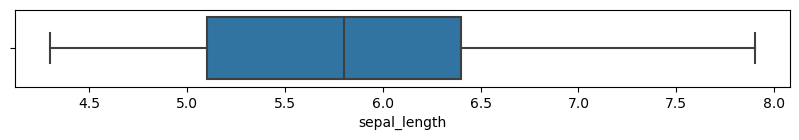


Attribute: [ sepal_width ]   Good Range: [ 2.05 , 4.05 ]   Number of Outliers: [ 4 ]


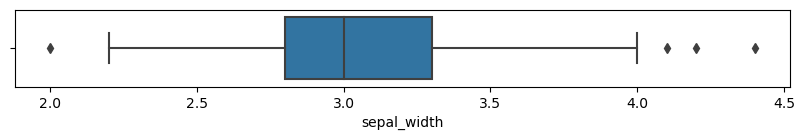

Index           Value
   15           4.400
   33           4.200
   32           4.100
   60           2.000

Attribute: [ petal_length ]   Good Range: [ -3.649999999999999 , 10.349999999999998 ]   Number of Outliers: [ 0 ]


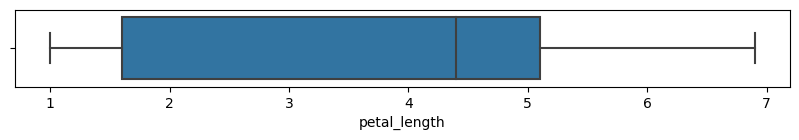


Attribute: [ petal_width ]   Good Range: [ -1.95 , 4.05 ]   Number of Outliers: [ 0 ]


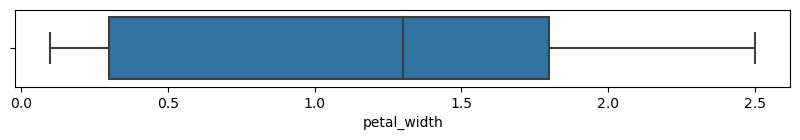


Attribute: [ sepal_area ]   Good Range: [ 8.749999999999996 , 27.150000000000002 ]   Number of Outliers: [ 3 ]


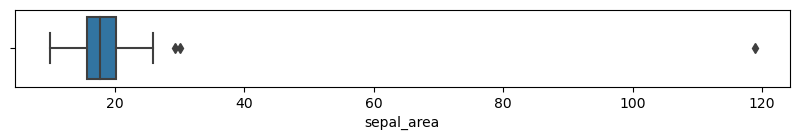

Index           Value
   21         118.870
  132          30.020
  118          29.260

Attribute: [ sepal_shape_val ]   Good Range: [ 0.558719758064516 , 3.226058467741936 ]   Number of Outliers: [ 1 ]


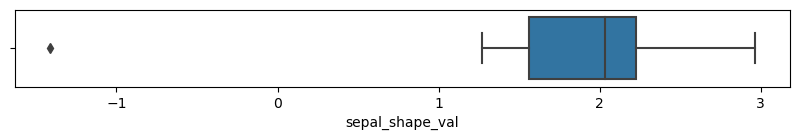

Index           Value
   24          -1.412

Attribute: [ petal_area ]   Good Range: [ -13.52625 , 23.66375 ]   Number of Outliers: [ 0 ]


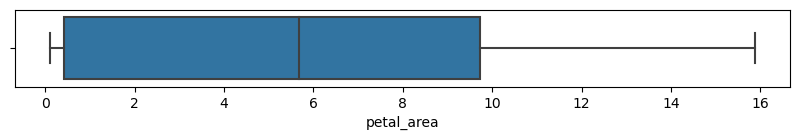


Attribute: [ petal_shape_val ]   Good Range: [ -0.0065789473684207955 , 7.47061403508772 ]   Number of Outliers: [ 19 ]


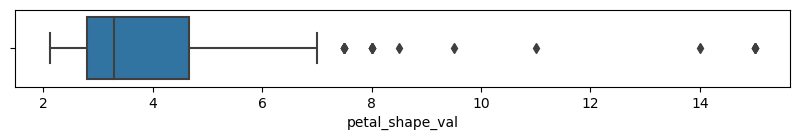

Index           Value
    9          15.000
   32          15.000
   34          15.000
   37          15.000
   12          14.000
   13          11.000
   24           9.500
   20           8.500
   11           8.000
   25           8.000
   29           8.000
   30           8.000
   46           8.000
    3           7.500
    7           7.500
   10           7.500
   27           7.500
   39           7.500
   48           7.500


In [63]:
outlier_indices = []
for att in numerical_attribute_names:
    outlier_indices = find_outliers(data_df, att)
    outlier_indices.extend(outlier_indices)
#print(f"All Outlier Indices: {outlier_indices}")

### **Categorical Attribute vs Categorical Attribute**

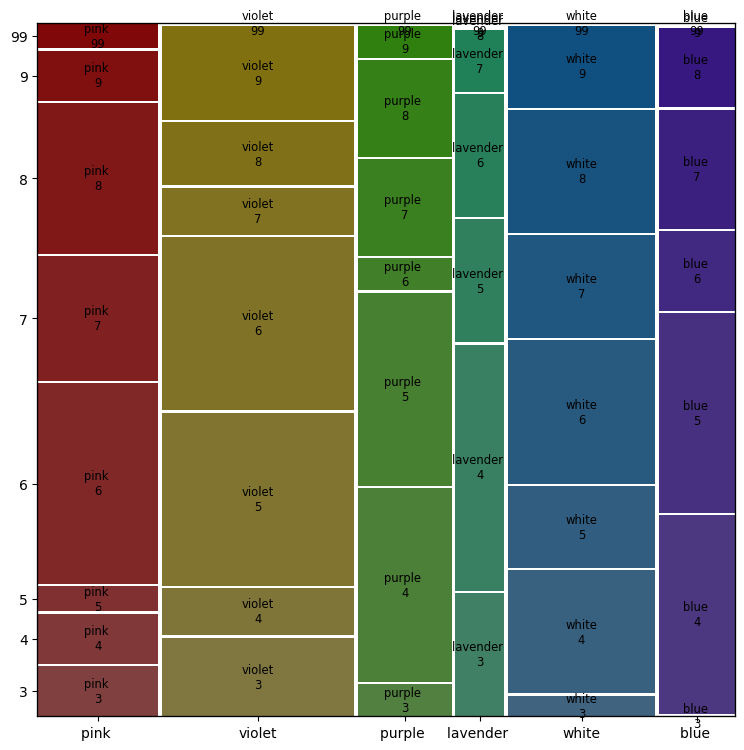

In [64]:
# EXAMPLE: Visualize the relationship between two specific categorical variables.
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(9,9)
mosaic(data_df.sort_values(by='zone', ascending=True), ['color', 'zone'], title='')
plt.show()

In [65]:
def chi2_test(data_frame, categorical_variable1, categorical_variable2, alpha):
    import pandas as pd
    from scipy import stats
    
    if categorical_variable1==categorical_variable2:
        return 0.00, False    # Comparing variable with self.  p_value = 0, reject_h0 = False
    
    # Convert to crosstab contigency table
    mycrosstab=pd.crosstab(data_frame[categorical_variable1],data_frame[categorical_variable2])
    #print(mycrosstab)
    # Get p_value and other information
    stat,p_value,dof,expected = stats.chi2_contingency(mycrosstab)
    #print("Details:",categorical_variable1,categorical_variable2,stat,p_value,dof)
    # Round very small p_value to zero
    p_value = round(p_value,10)
    # Expected frequencies should be at least 5 for the majority (80%) of the cells.
    # Check expected frequency of each group
    cntexpected = expected[expected<5].size
    # Get percentage 
    perexpected = ((expected.size-cntexpected)/expected.size)*100
    if perexpected<20:
        p_value = 2.00        # Assign 2 as a flag that result is inconclusive
    # Reject H0?
    reject_h0 = (p_value < alpha)
    return p_value, reject_h0

In [66]:
# Use Chi-Squared test to check for a relationship between all pairs of categorical variables.
# See, for example: https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f
def create_chi2_matrix(df):
    column_names = df.columns # Assign column names to row indexs 
    chisqmatrix = pd.DataFrame(df,columns=column_names,index=column_names)

    outercnt = 0
    innercnt = 0
    for icol in column_names: # outer loop
        for jcol in column_names: # inner loop
            p_value, reject_h0 = chi2_test(df, icol, jcol, 0.05)
            chisqmatrix.iloc[outercnt,innercnt] = p_value
            innercnt = innercnt+1
        outercnt = outercnt+1
        innercnt = 0
    return chisqmatrix

In [67]:
# Use Chi-Squared test to check for relationships between all pairs of categorical variables.
# If a p-value in the table below is less than a chosen alpha (say 0.05), then the H0 hypothesis that
#   there is NO relationship between the two variables is REJECTED.
chi2matrix = create_chi2_matrix(data_df[categorical_attribute_names])
display(chi2matrix)

,species,sepal_shape,petal_shape,color,zone
species,0.0,0.0,0.0,0.0,0.000007
sepal_shape,0.0,0.0,0.0,0.000299,0.000873
petal_shape,0.0,0.0,0.0,0.000044,0.002937
color,0.0,0.000299,0.000044,0.0,0.179207
zone,0.000007,0.000873,0.002937,0.179207,0.000000


**Discussion:**
- Based on the ChiSquared test, with Alpha chosen to be 0.05, there is a relationship between all pairs of variables, EXCEPT **color** and **zone**.
- So if we were given the task of predicting the species based on the other attributes, we would not want to remove any of the categorical attributes (at this point at least).

### **Categorical Attribute vs Numerical Attribute**

In [ ]:
# # EXAMPLE: Visualize the relationship between a specific categorical variable and a specific numerical variable.
# #   (Violin plots work nicely too.)
# plt.rcParams["figure.figsize"]=(5,5)
# ax = data_df.boxplot('petal_length', by='species')
# ax.get_figure().suptitle(t="")
# plt.title("Box Plot petal_length by species")
# plt.show()

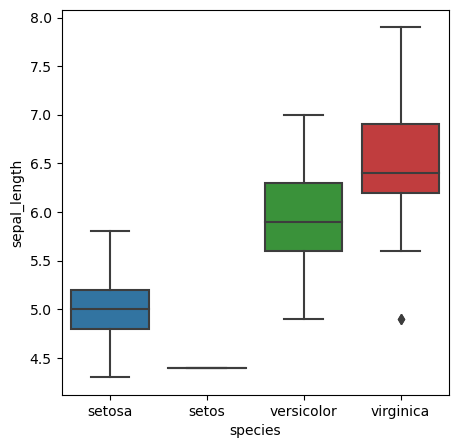

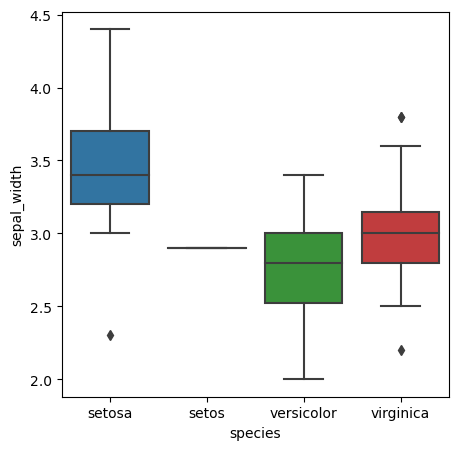

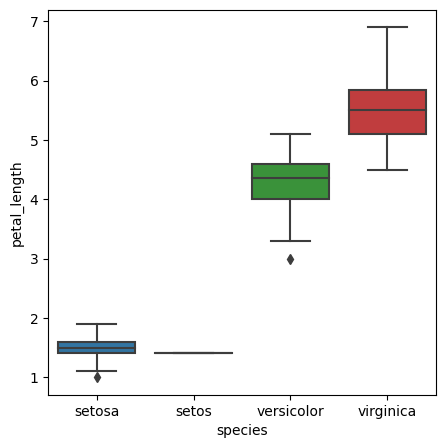

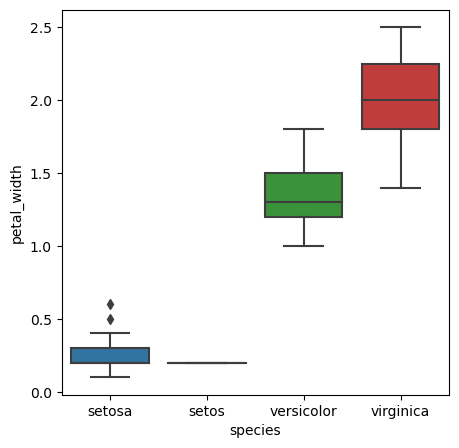

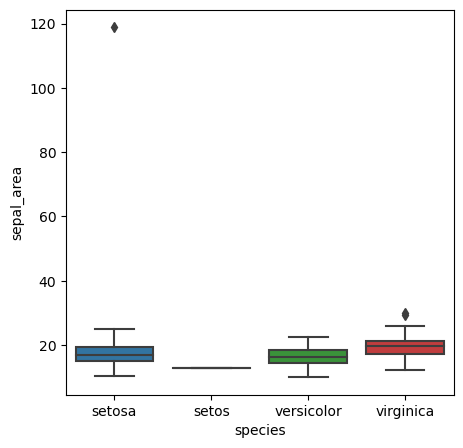

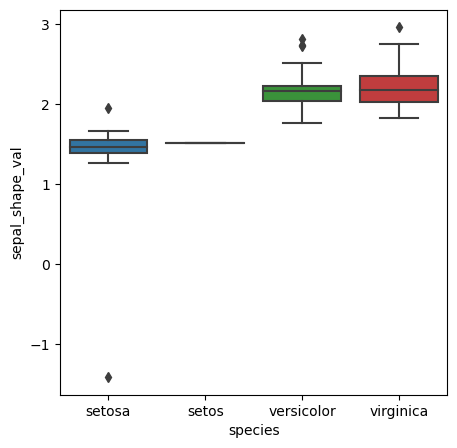

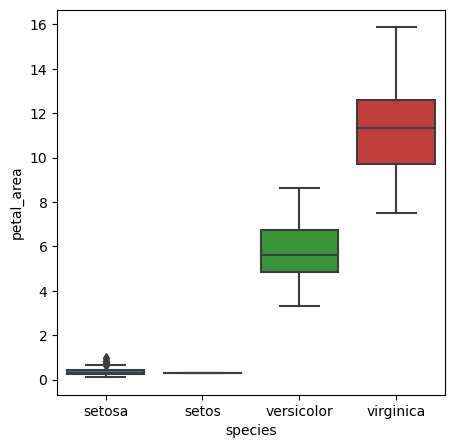

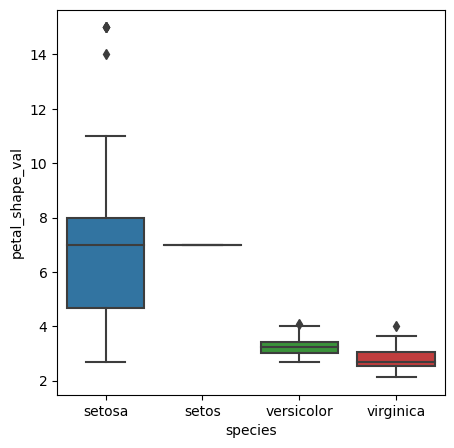

In [68]:
# Visualize the relationship between a specific categorical variable (the class variable in this case)
#   and all numerical variables.  (Violin plots work nicely too.)
for f in numerical_attribute_names:
    plt.figure(figsize=(5,5))
    sns.boxplot(x="species", y=f, data=data_df)

In [69]:
# Compute ANOVA for a specific categorical and numerical variable pair.
# Note: You also can use the t-test if there are only two values for the categorical variable.
def anova_test(data_frame, categorical_variable, numerical_variable, alpha):
    # See: https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
    # Calculate the f-value using the statsmodel module. 
    # You first build the model using the ols() function, and then call the fit() function on the instance of the model.
    # Finally, you call the anova_lm() function on the fitted model and specify the type of ANOVA test to perform on it:
    #   There are 3 types of ANOVA tests to perform, but their discussion is beyond the scope of this discussion.
    # Note: Hypothesis H0 = There is NO significant influence of the categorical variable on the numerical variable.
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    param_string = numerical_variable + " ~ " + categorical_variable
    model = ols(param_string, data=data_frame).fit()
    result = sm.stats.anova_lm(model, typ=2)
    #print(result)

    p_value = result.iat[0, 3]
    reject_h0 = (p_value < alpha)
    return p_value, reject_h0

In [70]:
# Compute ANOVA for the categorical attribute "species" and each numerical attribute.
# Note: Hypothesis H0 = There is NO significant influence of the categorical attribute on the numerical attribute.
alpha = 0.05  # Chosen by the data analyst, based on the business problem.
cat_att = "species"

print("   P_Value             Reject_H0        Cat_Attribute        Num_Attribute")
for num_att in numerical_attribute_names:
    p_value, reject_h0 = anova_test(data_df, cat_att, num_att, alpha)
    print("%10.6f  %20s %20s %20s" % (p_value, reject_h0, cat_att, num_att))

   P_Value             Reject_H0        Cat_Attribute        Num_Attribute
  0.000000                  True              species         sepal_length
  0.000000                  True              species          sepal_width
  0.000000                  True              species         petal_length
  0.000000                  True              species          petal_width
  0.265830                 False              species           sepal_area
  0.000000                  True              species      sepal_shape_val
  0.000000                  True              species           petal_area
  0.000000                  True              species      petal_shape_val


**Discussion:**
- Based on the Anova test, with Alpha chosen to be 0.05, there is a relationship between **species** and each of the numerical attributes.
- So if we were given the task of predicting the species based on the other attributes, we would not want to remove any of the numerical attributes (at this point at least).

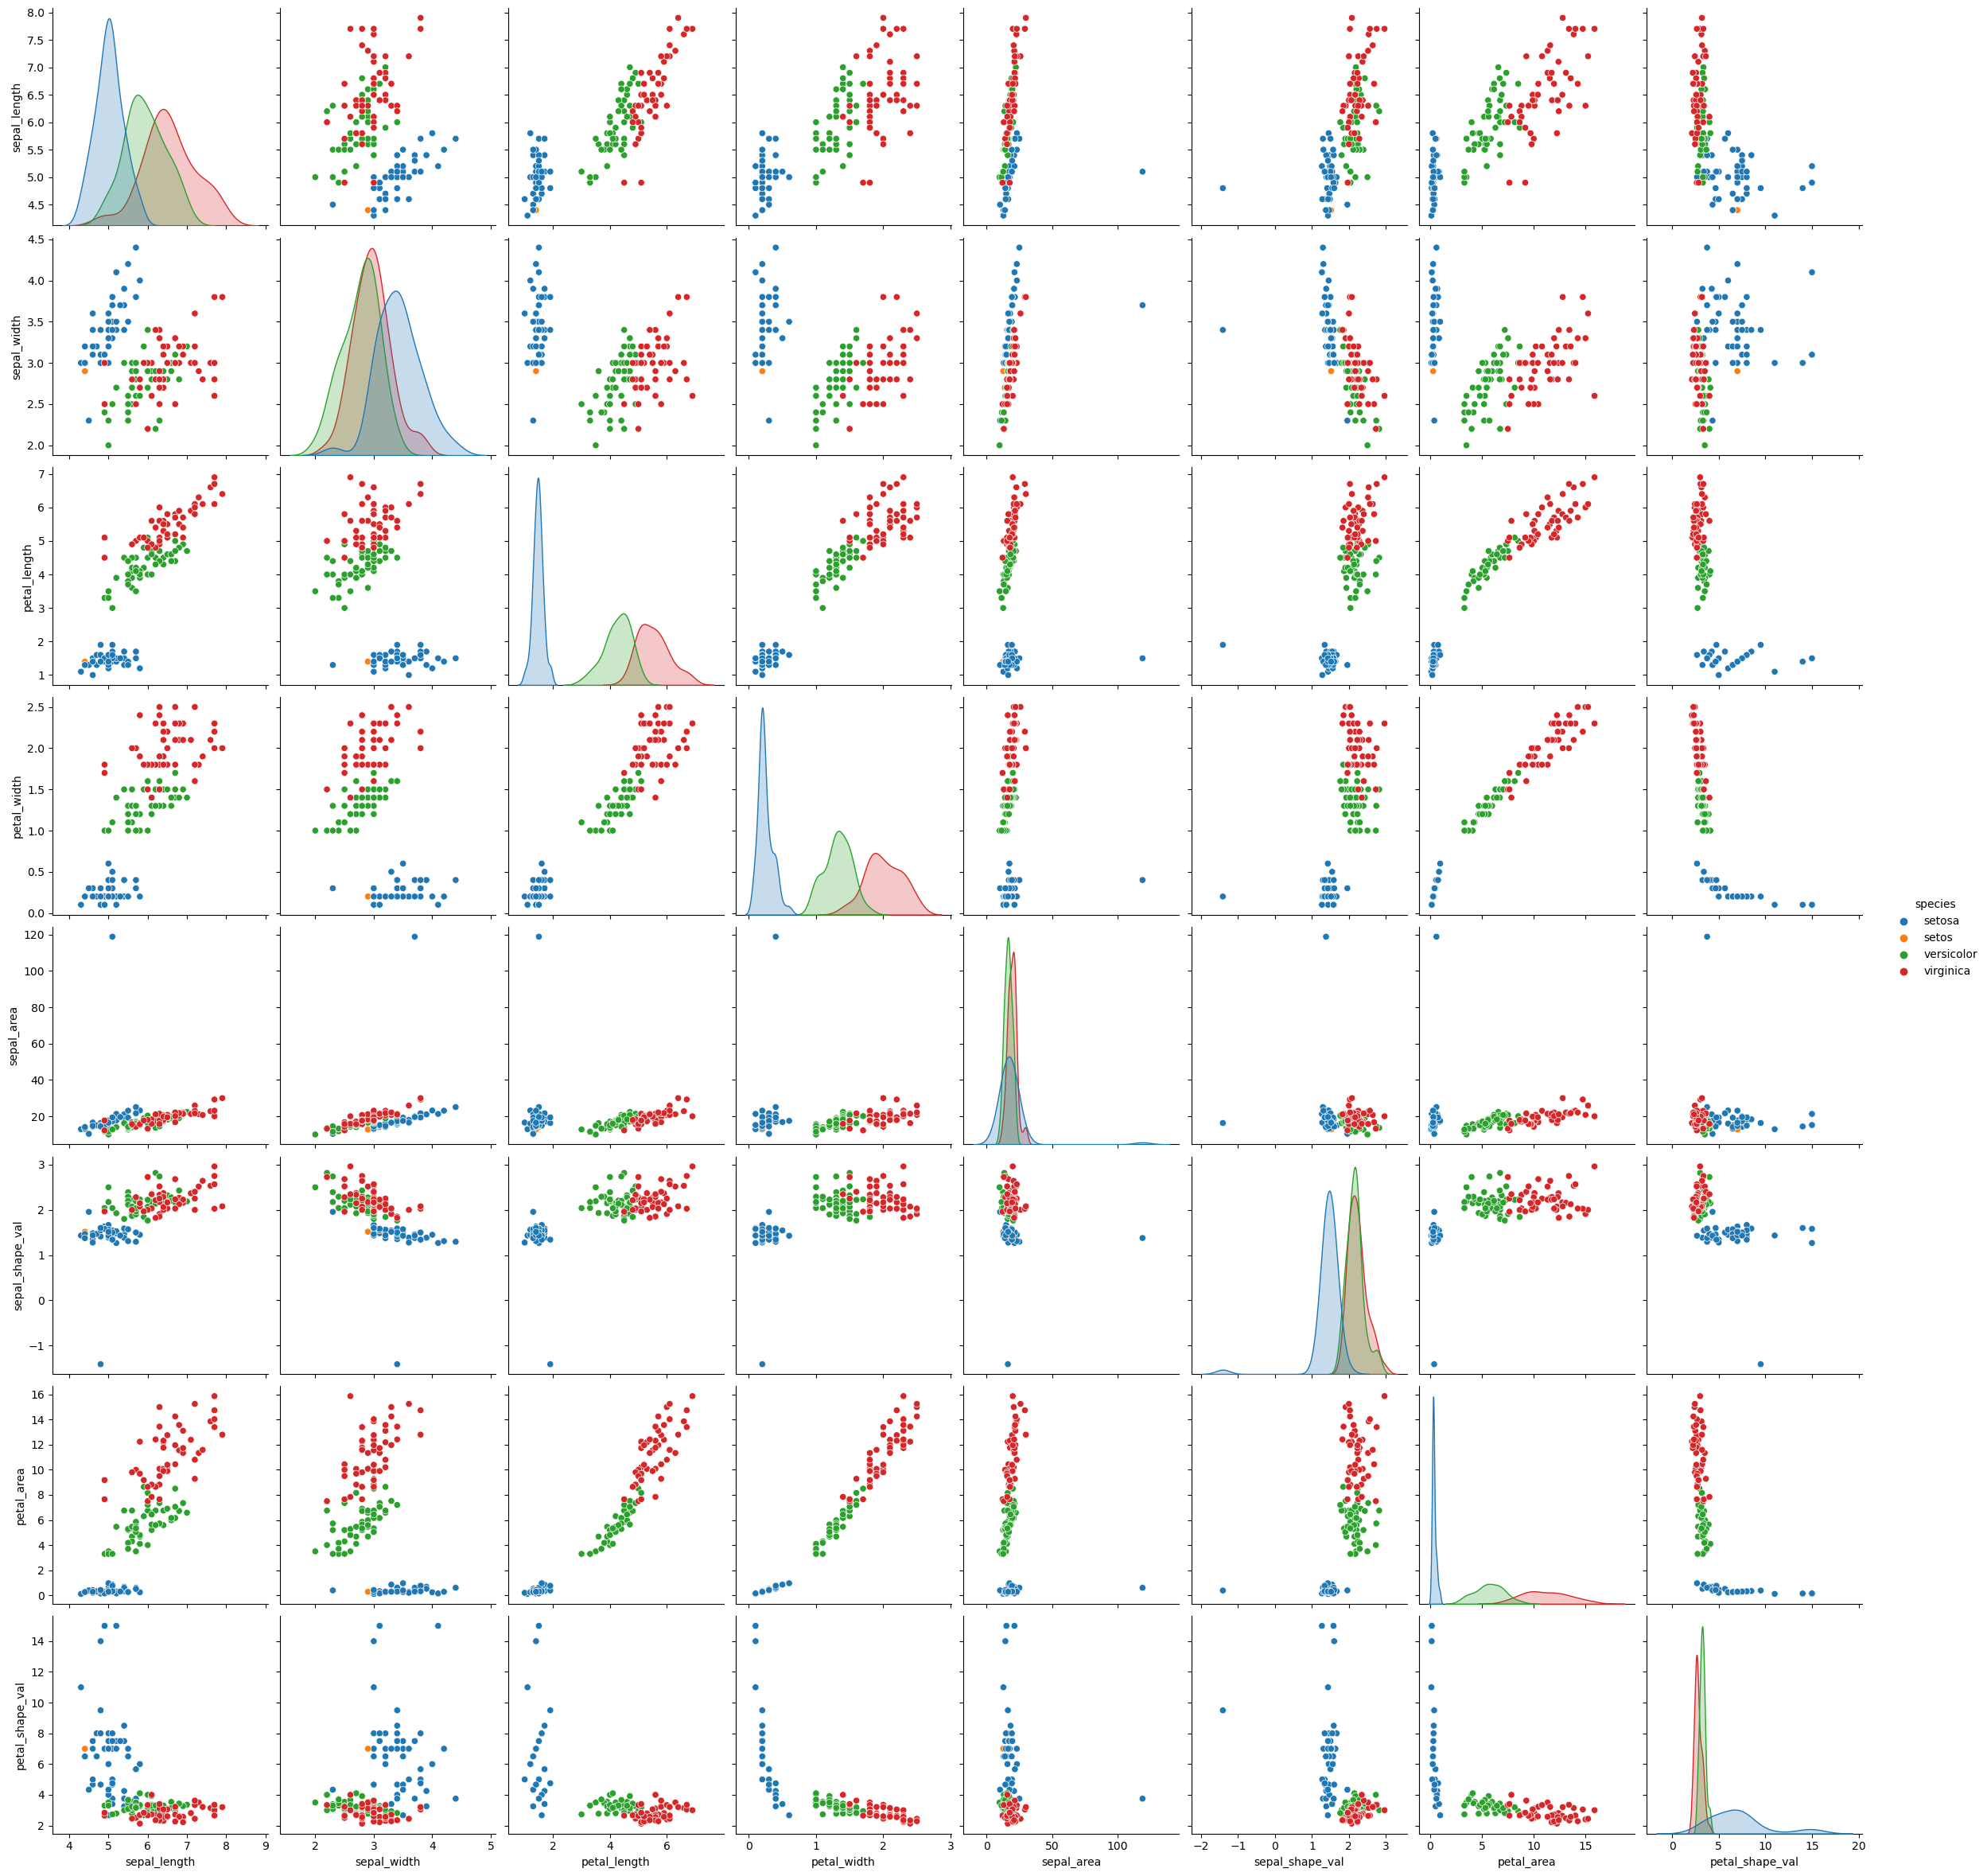

In [71]:
# Visualize the relationship between all pairs of numerical variables, to look for potential relationships.
sns.pairplot(data = data_df[numerical_attribute_names+[class_attribute_name]], hue=class_attribute_name, height=3)
plt.show()

<Axes: >

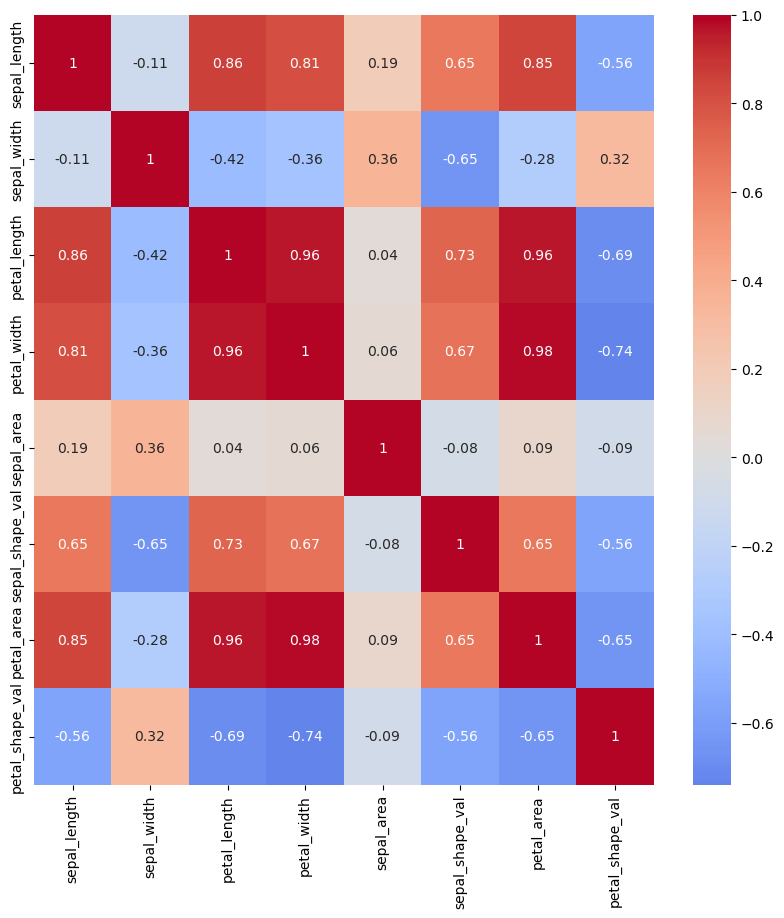

In [72]:
# Compute all of the (Pearson) *linear* correlations between pairs of numerical variables and display a heatmap.
# Note: You also could compute Spearman's Rank correlation (which can capture non-linear relationships).
#   See: https://www.statology.org/spearman-correlation-python/

cor = data_df[numerical_attribute_names].corr(method='pearson').round(2)
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, center=0.0, cmap='coolwarm')

In [73]:
# # Note that for our purposes, a strong *negative* relationship may be as valuable as a strong *positive* relationship,
# #   so we could do the following to look at absolute values.
# cor = abs(data_df[numerical_attribute_names].corr(method='pearson').round(2))
# plt.figure(figsize=(10,10))
# sns.heatmap(cor,annot=True, center=0.5, cmap='coolwarm')

In [74]:
# Create a copy of the dataset for cleaning
clean_data_df = data_df.copy()

**Revise the Data**

species:
- For the **species** attribute, the "setos" value is clearly a typo and could be corrected to "setosa".
- The missing **species** is problematic.  The resolution depends on the expected use of this data.  If the species is the "class" attribute and we want to use this dataset for training a classifier model, then we could / should remove this record.

In [75]:
clean_data_df['species'] = clean_data_df['species'].replace(to_replace='setos', value='setosa')

In [76]:
clean_data_df = clean_data_df.dropna(subset=['species'])
clean_data_df = clean_data_df.reset_index(drop=True)

zone:
- For the **zone** attribute, there is no such "99" zone.  Most likely, this is a typo, and should be "9".  But it might also be a special "flag" value entered by the creator of the dataset.  Further research is needed, but for now, let's assume we should change "99" to "9".

In [77]:
clean_data_df['zone'] = clean_data_df['zone'].replace(to_replace=99, value=9)

row_id:
- The **row_id** "111" records are completely identical.  Suggested action:
    - Remove all but one of the "111" duplicate rows.
- The **row_id** "149" records have the same row_id, but differ in the **sepal_length** field.  Suggested actions:
    - Remove all but one of the duplicate rows, OR set the row_id of one of them to a new, unused number. (I chose the former.)

In [78]:
clean_data_df.drop_duplicates(keep='first', inplace=True)  # This removes all but one copy of the records that are completely identical.
clean_data_df = clean_data_df.reset_index(drop=True)

In [79]:
clean_data_df.drop_duplicates(subset=['row_id'], keep='first', inplace=True)  # This removes all but one copy of the records that have identical row_ids.
clean_data_df = clean_data_df.reset_index(drop=True)

sepal_area:
- The **sepal_area** has one clearly wrong value (118.87).  The other outliers are not much out of the normal range.  The clearly wrong value can be filled in by **sepal_width * sepal_length** (see metadata).
- The **sepal_area** has one NaN value.  The NaN value can be filled in by **sepal_width * sepal_length** (see metadata).

In [80]:
clean_data_df.loc[(clean_data_df.sepal_area >= 118.0) & (clean_data_df.sepal_area <= 119.0),'sepal_area'] = \
    clean_data_df.sepal_length * clean_data_df.sepal_width

In [81]:
clean_data_df['sepal_area'].fillna(clean_data_df['sepal_width'] * clean_data_df['sepal_length'], inplace=True)

sepal_shape_val:
- The negative **sepal_shape_val** (-1.412) is clearly wrong and can be filled in by the formula in the metadata.

In [82]:
clean_data_df.loc[(clean_data_df.sepal_shape_val >= -1.42) & (clean_data_df.sepal_shape_val <= -1.41),'sepal_shape_val'] = \
    clean_data_df.sepal_length / clean_data_df.sepal_width

sepal_shape:
- The NaN **sepal_shape** value can be filled in by the formula in the metadata:
  - If (sepal_shape_val<2) "square"; else "oblong"

In [83]:
clean_data_df['sepal_shape'] = np.where((clean_data_df.sepal_shape_val < 2), "square", clean_data_df.sepal_shape)
clean_data_df['sepal_shape'] = np.where((clean_data_df.sepal_shape_val >= 2), "oblong", clean_data_df.sepal_shape)

petal_shape:
- For the **petal_shape** attribute, the "olong" value is clearly a typo and could be corrected to "oblong".

In [84]:
clean_data_df['petal_shape'] = clean_data_df['petal_shape'].replace(to_replace='olong', value='oblong')

**Check the Results**

In [85]:
# Data before cleaning
data_df.describe()

,row_id,sepal_length,sepal_width,petal_length,petal_width,sepal_area,sepal_shape_val,petal_area,petal_shape_val,zone
count,152.000000,152.000000,152.000000,152.000000,152.000000,151.000000,152.000000,152.000000,152.000000,152.000000
mean,75.230263,5.840789,3.051316,3.777632,1.207237,18.439735,1.939376,5.843553,4.346696,6.526316
std,43.675424,0.827376,0.431690,1.760463,0.761760,8.880396,0.480484,4.702909,2.639890,7.745922
min,0.000000,4.300000,2.000000,1.000000,0.100000,10.000000,-1.411765,0.110000,2.125000,3.000000
25%,37.750000,5.100000,2.800000,1.600000,0.300000,15.650000,1.558972,0.420000,2.797368,5.000000
50%,75.500000,5.800000,3.000000,4.400000,1.300000,17.640000,2.032292,5.680000,3.292857,6.000000
75%,112.250000,6.400000,3.300000,5.100000,1.800000,20.250000,2.225806,9.717500,4.666667,7.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,118.870000,2.961538,15.870000,15.000000,99.000000


In [86]:
# Data after cleaning
clean_data_df.describe()

,row_id,sepal_length,sepal_width,petal_length,petal_width,sepal_area,sepal_shape_val,petal_area,petal_shape_val,zone
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,74.060403,5.830872,3.053691,3.746309,1.190604,17.786644,1.953761,5.741812,4.380816,5.906040
std,43.255874,0.831386,0.435040,1.763846,0.759298,3.371206,0.399681,4.687157,2.655157,1.737279
min,0.000000,4.300000,2.000000,1.000000,0.100000,10.000000,1.268293,0.110000,2.125000,3.000000
25%,37.000000,5.100000,2.800000,1.600000,0.300000,15.640000,1.548387,0.420000,2.809524,5.000000
50%,74.000000,5.800000,3.000000,4.300000,1.300000,17.640000,2.031250,5.590000,3.300000,6.000000
75%,111.000000,6.400000,3.300000,5.100000,1.800000,20.100000,2.225806,9.690000,4.666667,7.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,30.020000,2.961538,15.870000,15.000000,9.000000


In [87]:
clean_data_df.head(999)

,row_id,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,sepal_shape_val,sepal_shape,petal_area,petal_shape_val,petal_shape,color,zone
0,0,5.1,3.5,1.4,0.2,setosa,17.85,1.457143,square,0.28,7.000000,very_long,violet,6
1,1,4.9,3.0,1.4,0.2,setosa,14.70,1.633333,square,0.28,7.000000,very_long,white,4
2,2,4.7,3.2,1.3,0.2,setosa,15.04,1.468750,square,0.26,6.500000,very_long,violet,5
3,3,4.6,3.1,1.5,0.2,setosa,14.26,1.483871,square,0.30,7.500000,very_long,violet,4
4,4,5.0,3.6,1.4,0.2,setosa,18.00,1.388889,square,0.28,7.000000,very_long,violet,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,6.7,3.0,5.2,2.3,virginica,20.10,2.233333,oblong,11.96,2.260870,square,white,6
145,146,6.3,2.5,5.0,1.9,virginica,15.75,2.520000,oblong,9.50,2.631579,square,white,9
146,147,6.5,3.0,5.2,2.0,virginica,19.50,2.166667,oblong,10.40,2.600000,square,violet,5
147,148,6.2,3.4,5.4,2.3,virginica,21.08,1.823529,square,12.42,2.347826,square,violet,7


In [88]:
# Get the duplicate records across all attributes.
dup_df = clean_data_df[clean_data_df.duplicated()]
num_dup_records = dup_df.shape[0]
print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 0


,row_id,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,sepal_shape_val,sepal_shape,petal_area,petal_shape_val,petal_shape,color,zone


In [89]:
# Get the missing values for the entire dataframe.
na_df = clean_data_df[clean_data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()
print("Total Records:", clean_data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

Total Records: 149 - Number of Records with NA: 0 - Number of NA Values: 0.0


,row_id,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,sepal_shape_val,sepal_shape,petal_area,petal_shape_val,petal_shape,color,zone


In [90]:
# Get the unique values for the categorical attributes.
print("Total Records:", clean_data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
for att in categorical_attribute_names:
    print(clean_data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
    print("\n")

Total Records: 149 - Value Counts per Categorical Attribute:

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64


oblong    83
square    66
Name: sepal_shape, dtype: int64


oblong       74
square       42
very_long    33
Name: petal_shape, dtype: int64


violet       42
white        32
pink         26
purple       21
blue         17
lavender     11
Name: color, dtype: int64


6    31
5    28
4    26
7    20
8    20
9    13
3    11
Name: zone, dtype: int64





Attribute: [ sepal_length ]   Good Range: [ 3.1499999999999986 , 8.350000000000001 ]   Number of Outliers: [ 0 ]


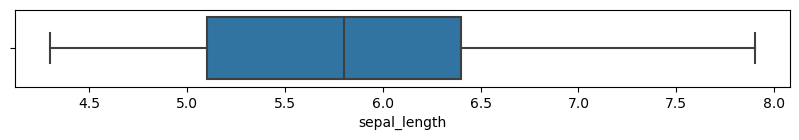


Attribute: [ sepal_width ]   Good Range: [ 2.05 , 4.05 ]   Number of Outliers: [ 4 ]


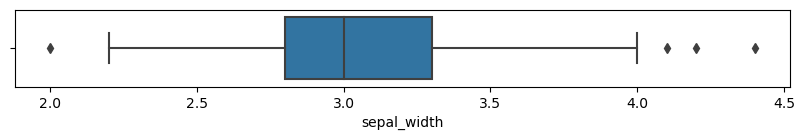

Index           Value
   15           4.400
   33           4.200
   32           4.100
   60           2.000

Attribute: [ petal_length ]   Good Range: [ -3.649999999999999 , 10.349999999999998 ]   Number of Outliers: [ 0 ]


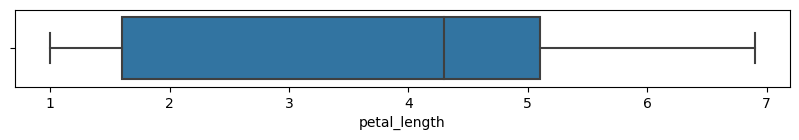


Attribute: [ petal_width ]   Good Range: [ -1.95 , 4.05 ]   Number of Outliers: [ 0 ]


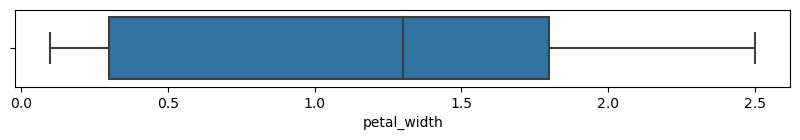


Attribute: [ sepal_area ]   Good Range: [ 8.949999999999996 , 26.790000000000006 ]   Number of Outliers: [ 2 ]


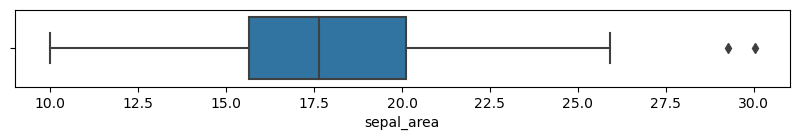

Index           Value
  131          30.020
  117          29.260

Attribute: [ sepal_shape_val ]   Good Range: [ 0.5322580645161286 , 3.2419354838709684 ]   Number of Outliers: [ 0 ]


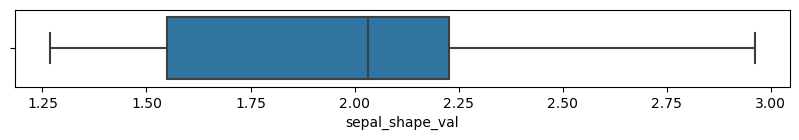


Attribute: [ petal_area ]   Good Range: [ -13.485 , 23.595 ]   Number of Outliers: [ 0 ]


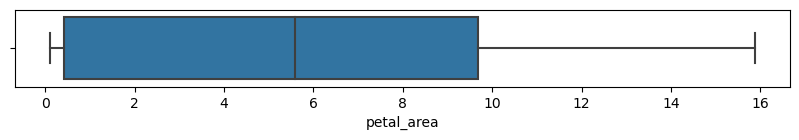


Attribute: [ petal_shape_val ]   Good Range: [ 0.02380952380952417 , 7.4523809523809526 ]   Number of Outliers: [ 19 ]


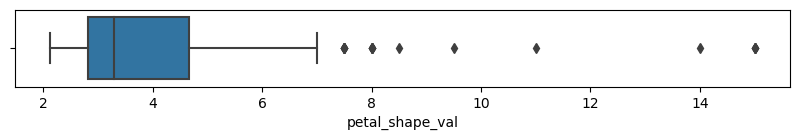

Index           Value
    9          15.000
   32          15.000
   34          15.000
   37          15.000
   12          14.000
   13          11.000
   24           9.500
   20           8.500
   11           8.000
   25           8.000
   29           8.000
   30           8.000
   46           8.000
    3           7.500
    7           7.500
   10           7.500
   27           7.500
   39           7.500
   48           7.500


In [91]:
# Get the outliers for the numerical attributes.
outlier_indices = []
for att in numerical_attribute_names:
    outlier_indices = find_outliers(clean_data_df, att)
    outlier_indices.extend(outlier_indices)

<Axes: xlabel='species', ylabel='petal_area'>

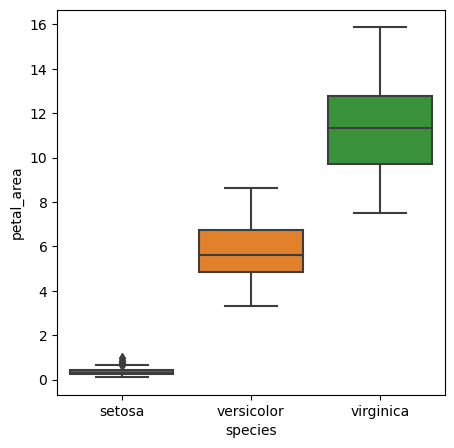

In [92]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="petal_area", data=clean_data_df)

<Axes: xlabel='species', ylabel='sepal_area'>

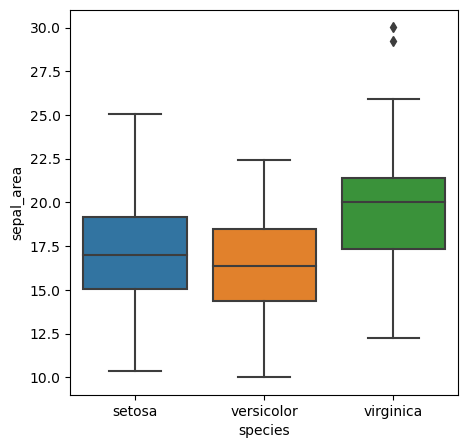

In [93]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="sepal_area", data=clean_data_df)

<Axes: xlabel='species', ylabel='sepal_shape_val'>

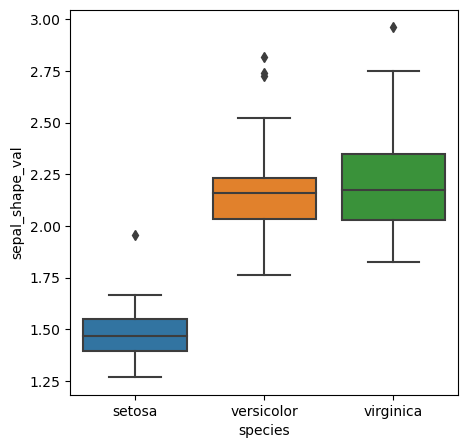

In [94]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="sepal_shape_val", data=clean_data_df)

<Axes: xlabel='species', ylabel='petal_shape_val'>

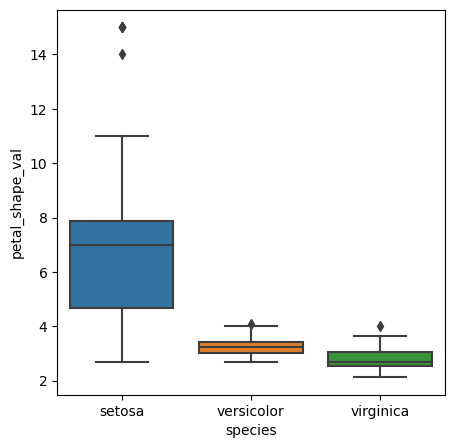

In [95]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="petal_shape_val", data=clean_data_df)

In [96]:
# Remove the attributes
clean_data_df.drop('sepal_area', axis=1, inplace=True)
clean_data_df.drop('sepal_shape_val', axis=1, inplace=True)
clean_data_df.drop('sepal_shape', axis=1, inplace=True)

In [97]:
clean_data_df.describe()

,row_id,sepal_length,sepal_width,petal_length,petal_width,petal_area,petal_shape_val,zone
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,74.060403,5.830872,3.053691,3.746309,1.190604,5.741812,4.380816,5.906040
std,43.255874,0.831386,0.435040,1.763846,0.759298,4.687157,2.655157,1.737279
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.110000,2.125000,3.000000
25%,37.000000,5.100000,2.800000,1.600000,0.300000,0.420000,2.809524,5.000000
50%,74.000000,5.800000,3.000000,4.300000,1.300000,5.590000,3.300000,6.000000
75%,111.000000,6.400000,3.300000,5.100000,1.800000,9.690000,4.666667,7.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,15.870000,15.000000,9.000000


In [98]:
clean_data_df['sepal_petal_length_ratio'] = clean_data_df['sepal_length'] / clean_data_df['petal_length']

In [99]:
clean_data_df['sepal_petal_length_ratio'].describe()

count    149.000000
mean       2.020683
std        1.062226
min        0.960784
25%        1.234375
50%        1.413043
75%        3.176471
max        4.833333
Name: sepal_petal_length_ratio, dtype: float64

In [100]:
# Z-Score using pandas (could also use SciKitLearn StandardScaler, stats.zscore, etc.)
clean_data_df['sepal_petal_length_ratio'] = \
    (clean_data_df['sepal_petal_length_ratio'] - clean_data_df['sepal_petal_length_ratio'].mean()) \
    / clean_data_df['sepal_petal_length_ratio'].std()

In [101]:
clean_data_df.describe()

,row_id,sepal_length,sepal_width,petal_length,petal_width,petal_area,petal_shape_val,zone,sepal_petal_length_ratio
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,74.060403,5.830872,3.053691,3.746309,1.190604,5.741812,4.380816,5.906040,1.430623e-16
std,43.255874,0.831386,0.435040,1.763846,0.759298,4.687157,2.655157,1.737279,1.000000e+00
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.110000,2.125000,3.000000,-9.978091e-01
25%,37.000000,5.100000,2.800000,1.600000,0.300000,0.420000,2.809524,5.000000,-7.402455e-01
50%,74.000000,5.800000,3.000000,4.300000,1.300000,5.590000,3.300000,6.000000,-5.720435e-01
75%,111.000000,6.400000,3.300000,5.100000,1.800000,9.690000,4.666667,7.000000,1.088081e+00
max,149.000000,7.900000,4.400000,6.900000,2.500000,15.870000,15.000000,9.000000,2.647884e+00


**Discussion:**
- We did not see a need to trim the dataset.  However, just as an example, suppose we wanted to create a very small sample dataset...

In [102]:
clean_data_sample_df = clean_data_df.sample(n=30, replace=True, random_state=45) #There are many ways to sample. See literature.

In [103]:
clean_data_sample_df.describe()

,row_id,sepal_length,sepal_width,petal_length,petal_width,petal_area,petal_shape_val,zone,sepal_petal_length_ratio
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,74.433333,5.976667,3.170000,3.763333,1.233333,6.147667,4.577795,6.066667,0.092540
std,48.189771,0.906179,0.532496,1.910855,0.836797,5.221592,3.237515,1.740657,1.103950
min,6.000000,4.400000,2.200000,1.200000,0.100000,0.140000,2.217391,3.000000,-0.851741
25%,31.250000,5.250000,2.825000,1.500000,0.300000,0.420000,2.714286,5.000000,-0.734215
50%,66.500000,6.000000,3.200000,4.450000,1.450000,6.455000,3.171429,6.000000,-0.606551
75%,120.750000,6.700000,3.400000,5.100000,2.000000,10.380000,4.666667,7.750000,1.167810
max,146.000000,7.900000,4.400000,6.900000,2.300000,15.870000,15.000000,9.000000,2.647884


### **Define the Cost Function**

In [104]:
# Helper function for evaluating the clasification results.  This is based on the Business Understanding step.
# This acually is "benefit", since a positive value is considered good.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def calculate_cost(conf_matrix):
#                           PREDICTED VALUES
#                    setosa  versicolor   virginica
    cost_matrix = [[    400,       -200,       -300],    # setosa
                   [   -100,        800,       -300],    # versicolor    TRUE VALUES
                   [   -100,       -200,       1200]]    # virginica

    total = 0
    for r in range(0, conf_matrix.shape[0]):
        for c in range(0, conf_matrix.shape[1]):
            total = total + cost_matrix[r][c] * conf_matrix[r][c]
    return total

### **Split the Dataset into Useful Pieces**

In [105]:
from sklearn.model_selection import train_test_split

# Specify the X (predictor) attributes and y (class) attribute.
X = clean_data_df.drop('species',axis=1)  # all but the class variable
y = clean_data_df['species']              # the class variable

y_unique_values = clean_data_df['species'].unique().tolist()
y_unique_values.sort(reverse=False)
print(y_unique_values)
print(clean_data_df['species'].value_counts())

# Split the dataset into the training and test datasets, for use in training a classification algorithm.
# Use a specific random seed, so it is reproducible.
# Kep "_all" for now, because we might trim them below.
X_train_all_att, X_test_all_att, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train_all_att.shape[0])
print(X_test_all_att.shape[0])

['setosa', 'versicolor', 'virginica']
setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64
99
50


In [106]:
# From the Data Understanding step, it appears that the **petal_area** attribute is particularly predictive of the **species**.
X_attributes_to_use = ['sepal_length','sepal_width','petal_length','petal_width']
# We could also try the "original" Iris attributes (from the standard dataset that is used commonly for example code.)
#X_attributes_to_use = ['sepal_length','sepal_width','petal_length','petal_width']

X_train = X_train_all_att[X_attributes_to_use]
X_test = X_test_all_att[X_attributes_to_use]

In [107]:
# Feature Scaling
# Before making any actual predictions, it is a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:
# "Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.
# For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, 
# the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately 
# proportionately to the final distance. The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also 
# converges faster with normalized features."

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# Calculate the best possible cost for the test dataset - when the class labels are perfect.
ccc=confusion_matrix(y_test, y_test, labels=['setosa','versicolor','virginica'])
best_possible_cost = calculate_cost(ccc)
print("Best Possible - Test data cost (benefit) is: ", best_possible_cost, "total, and per instance", best_possible_cost / len(y_test))

Best Possible - Test data cost (benefit) is:  38800 total, and per instance 776.0


***
### **Configure the off-the-shelf KNN classifier**
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [109]:
#K-Nearest Neighbors Algorithm in Python and Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier

knn_num_neighbors = 5   # Chosen as an example
classifier = KNeighborsClassifier(n_neighbors=knn_num_neighbors)

***
### **Run and Evaluate the Classifier for a Single (Example) K Parameter Value**
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [110]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
# Generate the predictions for the Training data, and evaluate the results.
y_pred = classifier.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_pred, labels=y_unique_values)
print(conf_matrix) # true values in rows, predicted in columns
print(classification_report(y_train, y_pred))

knn_train_cost = calculate_cost(conf_matrix)
print(knn_num_neighbors, "Nearest Neighbor - Training data cost (benefit) is: ", knn_train_cost, "total, and per instance", knn_train_cost / len(y_test))

[[31  0  0]
 [ 0 33  2]
 [ 0  5 28]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       0.87      0.94      0.90        35
   virginica       0.93      0.85      0.89        33

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99

5 Nearest Neighbor - Training data cost (benefit) is:  70800 total, and per instance 1416.0


In [112]:
# Generate the predictions for the Test data, and evaluate the results.
y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=y_unique_values)
print(conf_matrix) # true values in rows, predicted in columns
print(classification_report(y_test, y_pred))

knn_cost = calculate_cost(conf_matrix)
print(knn_num_neighbors, "Nearest Neighbor - Test data cost (benefit) is: ", knn_cost, "total, and per instance", knn_cost / len(y_test))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

5 Nearest Neighbor - Test data cost (benefit) is:  38800 total, and per instance 776.0


***
### **Run and Evaluate the Classifier for a Range of K Parameter Values**
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [113]:
# Calculate quality measures for various K values.
quality_accuracy_meas = []
quality_cost_meas = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    quality_accuracy_meas.append(accuracy_score(y_test, pred_i))
    quality_cost_meas.append(calculate_cost(confusion_matrix(y_test, pred_i, labels=y_unique_values)))   # cost values

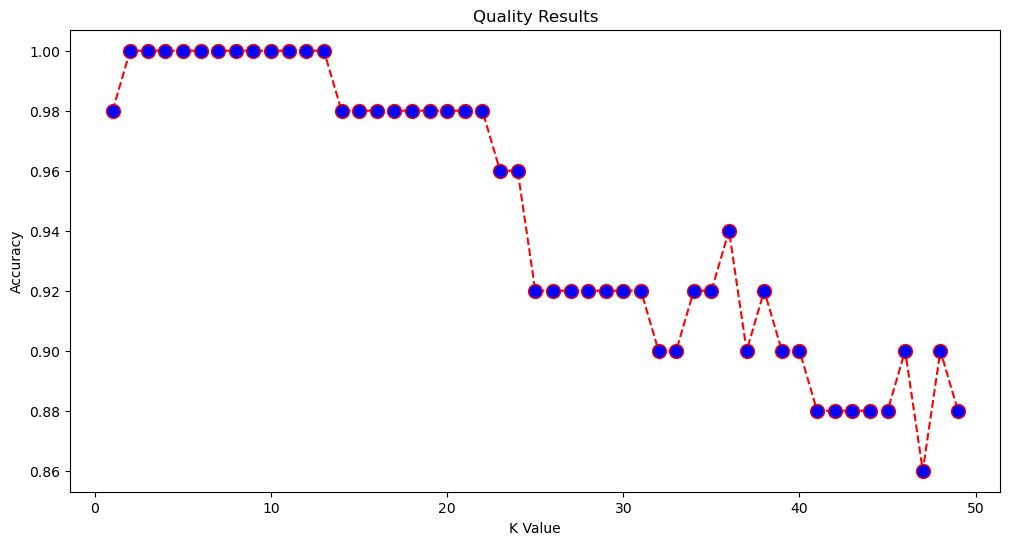

In [114]:
# Plot the accuracy values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), quality_accuracy_meas, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Quality Results')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

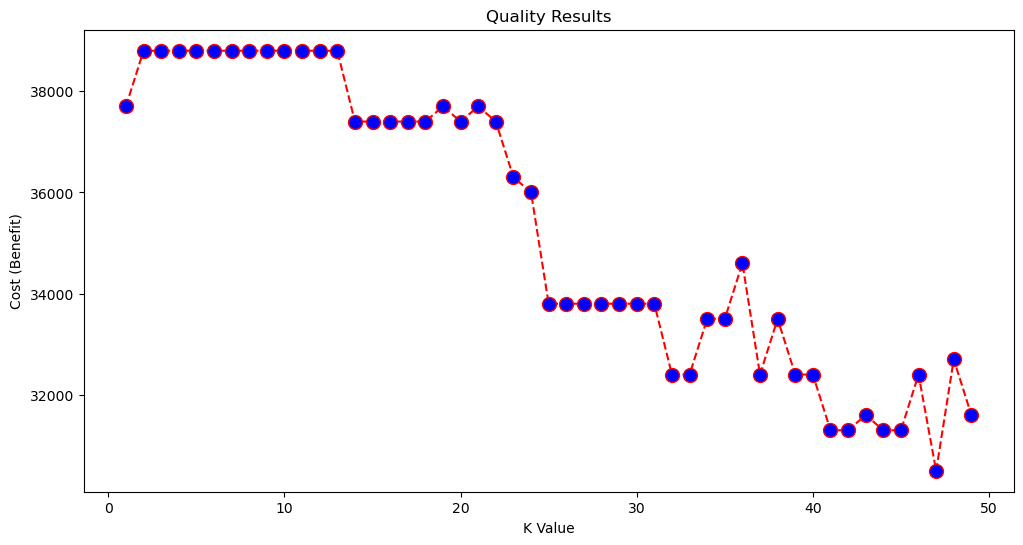

In [115]:
# Plot the cost values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), quality_cost_meas, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Quality Results')
plt.xlabel('K Value')
plt.ylabel('Cost (Benefit)')
plt.show()